**Корректность проверена на Python 3.6:**
+ pandas 0.23.4
+ numpy 1.15.4
+ xgboost 0.81
+ sklearn 0.20.2

# Sklearn, XGBoost

## sklearn.ensemble.RandomForestClassifier

In [2]:
from sklearn import ensemble, model_selection, metrics 

import numpy as np
import pandas as pd
import xgboost as xgb

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Данные

Задача на kaggle: https://www.kaggle.com/c/bioresponse

Данные: https://www.kaggle.com/c/bioresponse/data

По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response).

Признаки нормализаваны.

Для демонстрации используется обучающая выборка из исходных данных train.csv, файл с данными прилагается.

In [5]:
bioresponce = pd.read_csv('bioresponse.csv', header=0, sep=',')

In [6]:
bioresponce.head()
# первый столбец - метка класса

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [7]:
bioresponce_target = bioresponce.Activity.values

In [8]:
bioresponce_data = bioresponce.iloc[:, 1:]

### Модель RandomForestClassifier

#### Зависимость качества от количесвта деревьев

In [15]:
n_trees = [1] + list(range(10, 55, 5)) 

In [16]:
%%time
scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=1)
    score = model_selection.cross_val_score(estimator, bioresponce_data, bioresponce_target, 
                                             scoring = 'accuracy', cv = 3)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

CPU times: user 11.1 s, sys: 1.25 s, total: 12.4 s
Wall time: 12.6 s


In [17]:
scoring
# первая строка соответствует 1 дереву
# последняя строка - пятидесяти деревьям

# каждый столбец соответсвует значению на конретном фолде

matrix([[0.66906475, 0.668     , 0.6704    ],
        [0.75859313, 0.7592    , 0.7504    ],
        [0.78097522, 0.7616    , 0.7592    ],
        [0.78417266, 0.7736    , 0.7648    ],
        [0.78257394, 0.7736    , 0.7704    ],
        [0.78816946, 0.7752    , 0.7736    ],
        [0.78816946, 0.7856    , 0.7776    ],
        [0.78896882, 0.78      , 0.7832    ],
        [0.78976819, 0.7856    , 0.7896    ],
        [0.79536371, 0.7816    , 0.7928    ]])

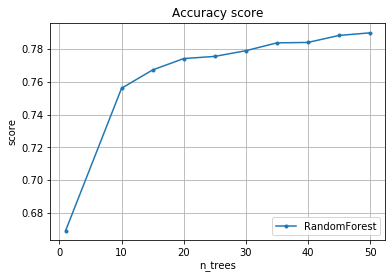

In [18]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

#### Кривые обучения для деревьев большей глубины

In [19]:
%%time
xgb_scoring = []
for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3)
    score = model_selection.cross_val_score(estimator, bioresponce_data, bioresponce_target, 
                                             scoring = 'accuracy', cv = 3)    
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

CPU times: user 2min 49s, sys: 1.99 s, total: 2min 51s
Wall time: 2min 53s


In [34]:
xgb_scoring

matrix([[0.76498801, 0.756     , 0.756     ],
        [0.77617906, 0.7752    , 0.7688    ],
        [0.77857714, 0.7744    , 0.7768    ],
        [0.7873701 , 0.7784    , 0.7768    ],
        [0.79216627, 0.7736    , 0.7832    ],
        [0.79776179, 0.7776    , 0.7824    ],
        [0.79616307, 0.7816    , 0.78      ],
        [0.79296563, 0.7848    , 0.7792    ],
        [0.79856115, 0.7832    , 0.7808    ],
        [0.79936051, 0.7832    , 0.7832    ]])

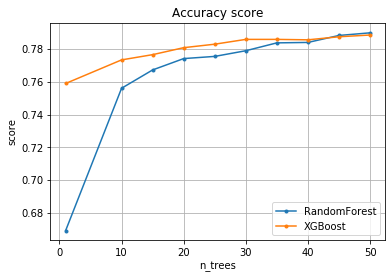

In [20]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

#### **Если Вас заинтересовал xgboost:**
python api: http://xgboost.readthedocs.org/en/latest/python/python_api.html

установка: http://xgboost.readthedocs.io/en/latest/build.html